In [84]:
from graphviz import Digraph
G = Digraph()
i = 0
class IS:
    def __init__(self,p):
        global G,i
        self.p = p
        self.children = {}
        i += 1
        self.i = i
        G.node(str(self.i),label=str(self.p))
        self.move = None
        self.next = None
        self.movenum = None
        self.moves = []
    def connect(self,IS2,move):
        global G
        self.children[move] = IS2
        G.edge(str(self.i),str(IS2.i),move)
        self.moves = list(self.children.keys())
    def play(self,move):
        if isinstance(move,int):
            self.movenum = move
            self.move = self.moves[self.movenum]
        self.move = move
        if self.next is not None:
            G.node(str(self.next.i),color="black")
        self.next = self.children[move]
        G.node(str(self.next.i),color="red")
    def __repr__(self):
        return f"Node {self.i} : Player {self.p} with actions " + ",".join(self.moves)
class Outcome:
    def __init__(self,t):
        global G,i
        i += 1
        self.i = i
        G.node(str(self.i),str(t))
        self.next = None
        self.u = t
    def __repr__(self) -> str:
        return f"Node {self.i} : {self.u}"

def Reset():
    global G,i
    i = 0
    G = Digraph()

def ReadStratergy(s,ISs):
    n = len(s)
    assert len(ISs) == n
    for x in range(n):
        I = ISs[x]
        I.play(s[x])

def CreateStratergies(ISs):
    if len(ISs) == 1:
        return [[x] for x in ISs[0].moves]
    S = []
    for s in CreateStratergies(ISs[:-1]):
        S.extend([s + [m] for m in ISs[-1].moves])
    return S

def CurrentStrategy(p,D):
    return [I.move for I in D[p]]

def InfoSetsForPlayers(ISs):
    D = {}
    for I in ISs :
        p = I.p
        if p not in D:
            D[p] = [I]
        else:
            D[p].append(I)
    return D

def ReadStratergyProfile(s,D):
    for p in s:
        assert p in D
        ReadStratergy(s[p],D[p])

def MakeProfile(s,D):
    S = {}
    i = 0
    for p in D:
        l = len(D[p])
        S[p] = s[i:i+l]
        i += l
    return S

def StratergyProfiles(D):
    ISs = []
    for p in D : ISs.extend(D[p])
    return [MakeProfile(s,D) for s in CreateStratergies(ISs)]

def BestResponses(P:int,D,Head):
    p = (list(D.keys()))[P]
    ISs = D[p]
    Bestsp = []
    Best = -100
    CS = [I.move for I in D[p]]
    for sp in CreateStratergies(ISs):
        ReadStratergy(sp,D[p])
        cur = Head
        while cur.next is not None: cur = cur.next
        u = cur.u
        u = u[P]
        if u > Best :
            Bestsp = [sp]
            Best = u
        elif u == Best :
            Bestsp.append(sp)
    ReadStratergy(CS,D[p])
    return Bestsp

def IsNash(D,Head):
    Players = list(D.keys())
    for P in range(len(Players)):
        b = BestResponses(P,D,Head)
        p = Players[P]
        sp = [I.move for I in D[p]]
        if sp not in b : return False
    return True

def NashEquilibria(D,Head):
    NE = []
    for SP in StratergyProfiles(D):
        ReadStratergyProfile(SP,D)
        if IsNash(D,Head):
            NE.append(SP)
    return NE
    

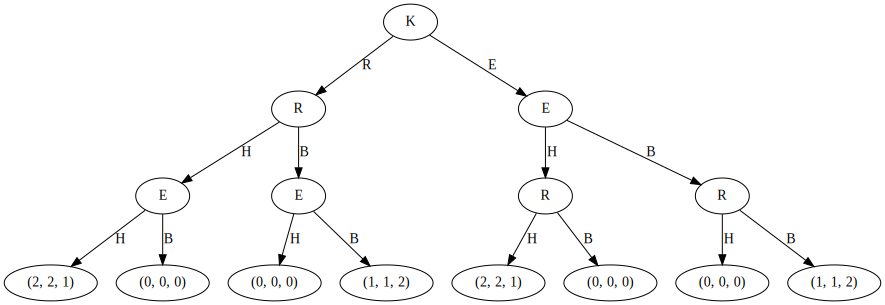

In [85]:
Reset()

IS1 = IS("K")
IS2 = IS("R")
IS3 = IS("E")
IS1.connect(IS2,"R")
IS1.connect(IS3,"E")

IS4 = IS("E")
IS5 = IS("E")
IS2.connect(IS4,"H")
IS2.connect(IS5,"B")

IS6 = IS("R")
IS7 = IS("R")
IS3.connect(IS6,"H")
IS3.connect(IS7,"B")

O1 = Outcome((2,2,1))
O2 = Outcome((0,0,0))
O3 = Outcome((0,0,0))
O4 = Outcome((1,1,2))
O5 = Outcome((2,2,1))
O6 = Outcome((0,0,0))
O7 = Outcome((0,0,0))
O8 = Outcome((1,1,2))

IS4.connect(O1,"H")
IS4.connect(O2,"B")
IS5.connect(O3,"H")
IS5.connect(O4,"B")
IS6.connect(O5,"H")
IS6.connect(O6,"B")
IS7.connect(O7,"H")
IS7.connect(O8,"B")
G


In [87]:
D = InfoSetsForPlayers([IS1,IS2,IS3,IS4,IS5,IS6,IS7])
N = NashEquilibria(D,IS1)
for n in N:
    ReadStratergyProfile(n,D)
    cur = IS1
    while cur.next is not None:
        cur = cur.next
    print(n," : ",cur.u)

{'K': ['R'], 'R': ['H', 'H', 'H'], 'E': ['H', 'H', 'H']}  :  (2, 2, 1)
{'K': ['R'], 'R': ['H', 'H', 'H'], 'E': ['H', 'H', 'B']}  :  (2, 2, 1)
{'K': ['R'], 'R': ['H', 'H', 'H'], 'E': ['B', 'H', 'H']}  :  (2, 2, 1)
{'K': ['R'], 'R': ['H', 'H', 'H'], 'E': ['B', 'H', 'B']}  :  (2, 2, 1)
{'K': ['R'], 'R': ['H', 'H', 'B'], 'E': ['H', 'H', 'H']}  :  (2, 2, 1)
{'K': ['R'], 'R': ['H', 'H', 'B'], 'E': ['H', 'H', 'B']}  :  (2, 2, 1)
{'K': ['R'], 'R': ['H', 'H', 'B'], 'E': ['B', 'H', 'H']}  :  (2, 2, 1)
{'K': ['R'], 'R': ['H', 'H', 'B'], 'E': ['B', 'H', 'B']}  :  (2, 2, 1)
{'K': ['R'], 'R': ['H', 'B', 'H'], 'E': ['H', 'H', 'H']}  :  (2, 2, 1)
{'K': ['R'], 'R': ['H', 'B', 'H'], 'E': ['H', 'H', 'B']}  :  (2, 2, 1)
{'K': ['R'], 'R': ['H', 'B', 'H'], 'E': ['B', 'H', 'H']}  :  (2, 2, 1)
{'K': ['R'], 'R': ['H', 'B', 'H'], 'E': ['B', 'H', 'B']}  :  (2, 2, 1)
{'K': ['R'], 'R': ['H', 'B', 'B'], 'E': ['H', 'H', 'H']}  :  (2, 2, 1)
{'K': ['R'], 'R': ['H', 'B', 'B'], 'E': ['H', 'H', 'B']}  :  (2, 2, 1)
{'K': 